# DBSCAN Project Solutions

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

**Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<Axes: xlabel='Milk', ylabel='Grocery'>

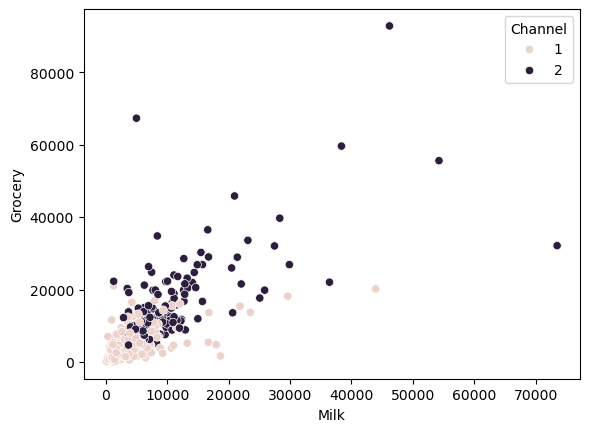

In [61]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

**Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

<Axes: xlabel='Milk', ylabel='Count'>

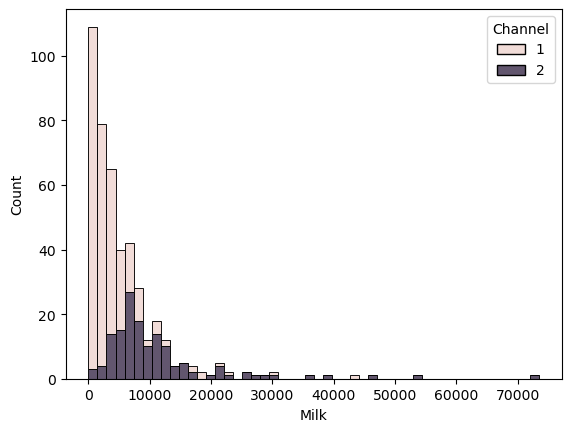

In [62]:
sns.histplot(df, x='Milk', hue='Channel', multiple="stack")

**Create an annotated clustermap of the correlations between spending on different cateogires.**

Correlation Between Spending Categories


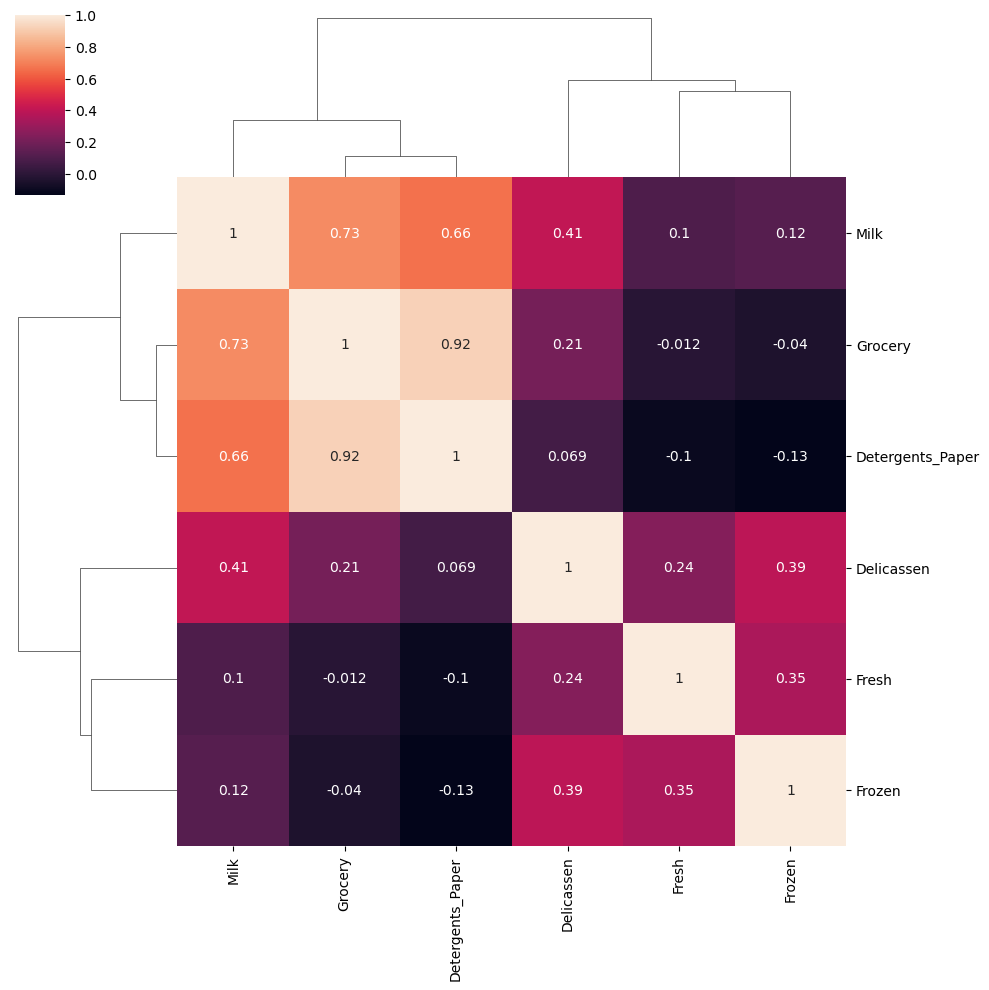

In [30]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True)

**Create a PairPlot of the dataframe, colored by Region.**

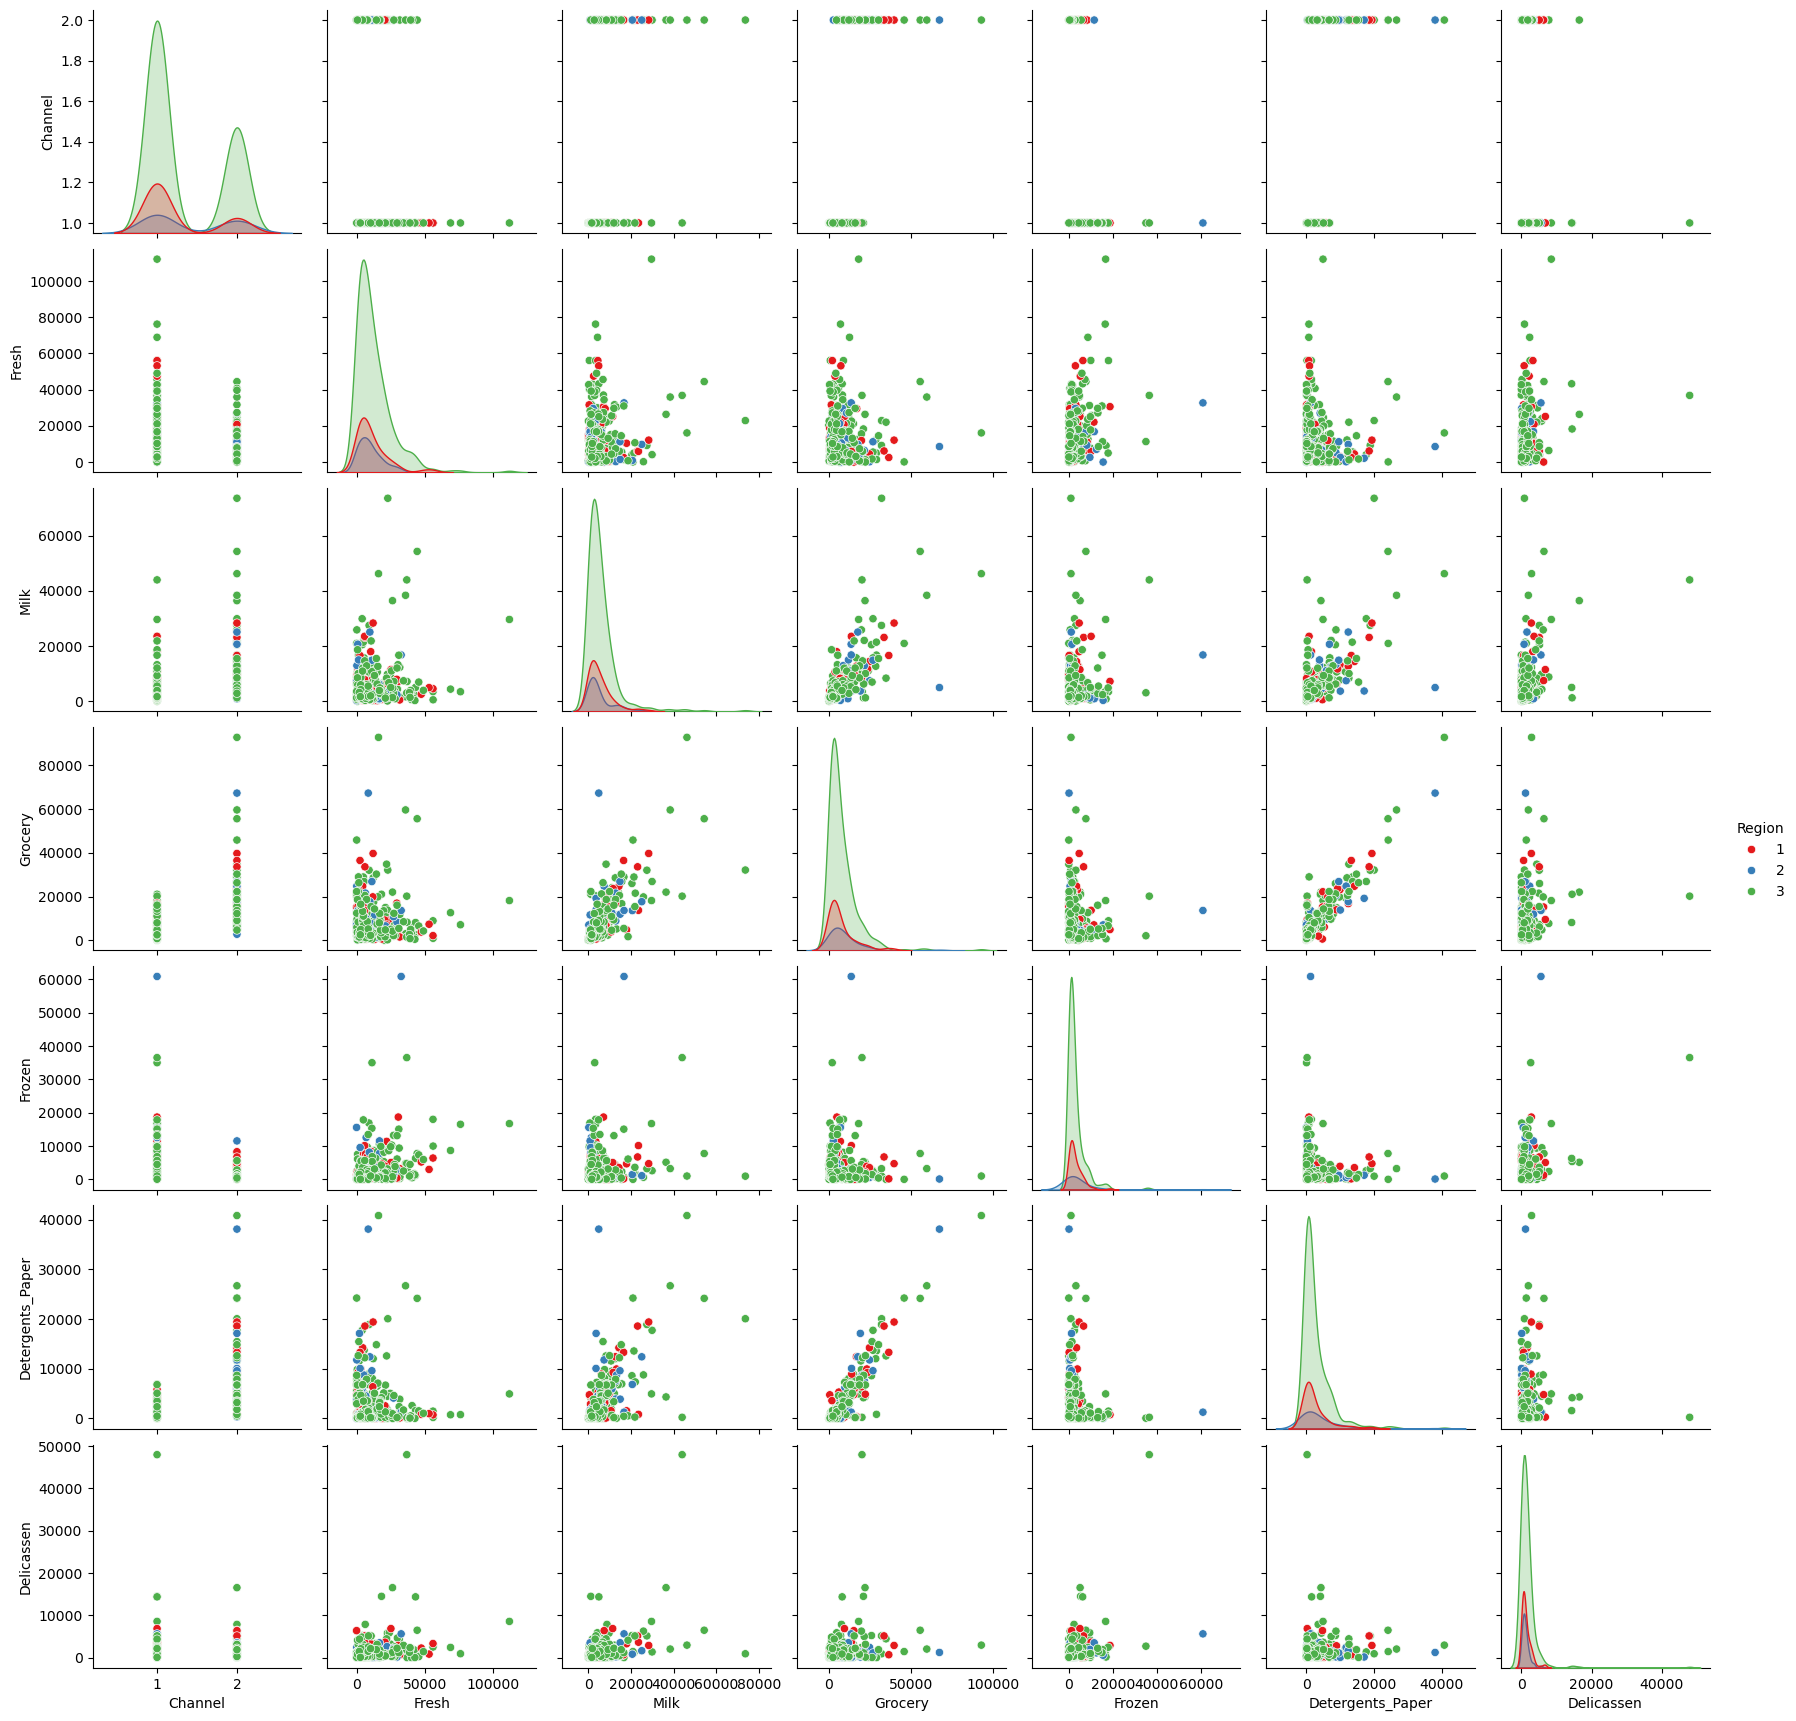

In [32]:
sns.pairplot(df, hue='Region', palette='Set1')

## DBSCAN

**Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [64]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of, and store the percentages of points that are outliers.**

    np.linspace(0.001,3,50)

In [37]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 50):

    # Create Model
    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)

    # Log percentages of points that are labelled as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

**Create a line plot of the percentage of outlier points versus the epsilon value choice.**

In [39]:
outlier_percent

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 96.13636363636364,
 85.68181818181819,
 81.81818181818181,
 76.36363636363636,
 73.63636363636364,
 70.45454545454545,
 65.0,
 56.81818181818182,
 47.95454545454545,
 39.54545454545455,
 32.5,
 27.954545454545453,
 24.545454545454547,
 22.272727272727273,
 20.90909090909091,
 20.227272727272727,
 19.318181818181817,
 17.954545454545453,
 15.0,
 14.318181818181818,
 12.5,
 10.681818181818182,
 10.227272727272727,
 8.181818181818182,
 7.7272727272727275,
 7.045454545454546,
 6.590909090909091,
 6.136363636363637,
 5.2272727272727275,
 4.7727272727272725,
 4.7727272727272725,
 4.545454545454546,
 4.090909090909091,
 3.8636363636363638,
 3.6363636363636362,
 3.6363636363636362,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727]

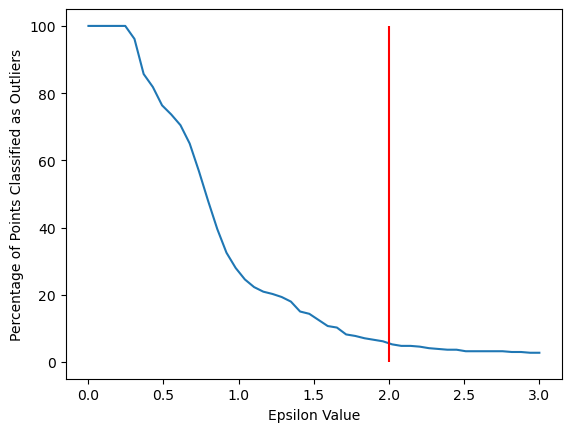

In [65]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.vlines(x=2.0, ymax=100, ymin=0,colors='r')

## DBSCAN with Chosen Epsilon

**Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [41]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

**Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<Axes: xlabel='Grocery', ylabel='Milk'>

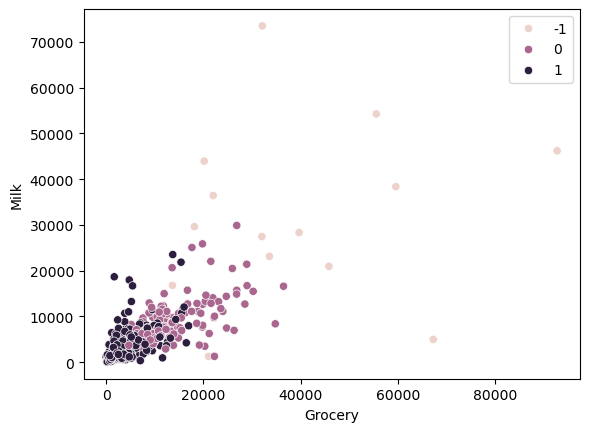

In [43]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan.labels_)

**Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

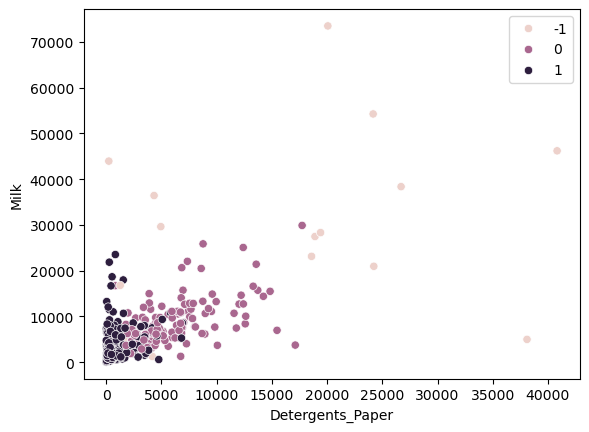

In [45]:
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk', hue=dbscan.labels_)

**Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [66]:
df['Labels'] = dbscan.labels_
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
28,2,3,4113,20484,25957,1158,8604,5206,0
114,1,3,18044,1080,2000,2555,118,1266,1
282,1,3,49063,3965,4252,5970,1041,1404,1
295,2,2,7588,1897,5234,417,2208,254,0
2,2,3,6353,8808,7684,2405,3516,7844,0
0,2,3,12669,9656,7561,214,2674,1338,0
382,1,3,34454,7435,8469,2540,1711,2893,1
333,2,2,8565,4980,67298,131,38102,1215,-1
205,2,1,1107,11711,23596,955,9265,710,0
401,1,3,27167,2801,2128,13223,92,1902,1


**Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [67]:
cats = df.drop(['Channel', 'Region'], axis=1)
cat_means = cats.groupby('Labels').mean()
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


**Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data, cat_means.index, cat_means.columns)

scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

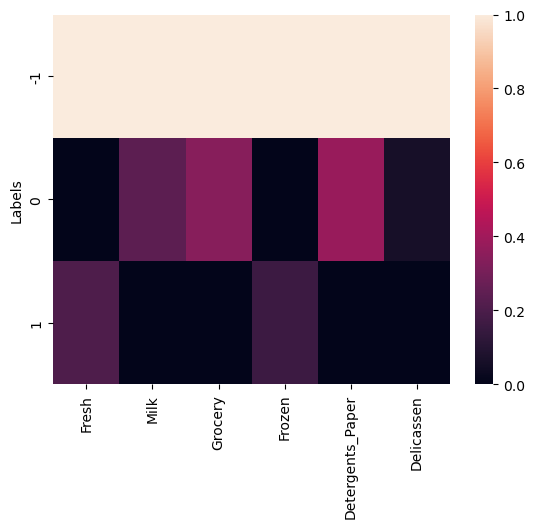

In [56]:
sns.heatmap(scaled_means)

**Create another heatmap similar to the one above, but with the outliers removed**

<Axes: ylabel='Labels'>

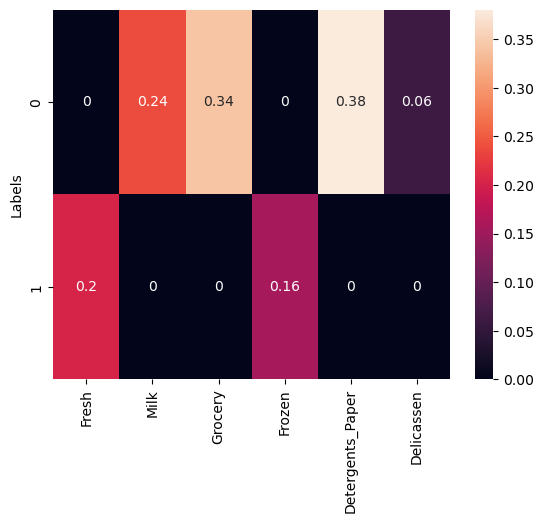

In [57]:
sns.heatmap(scaled_means.loc[[0, 1]], annot=True)

**What spending category were the two clusters mode different in?**

We can see that Detergents Paper was the most significant difference.